In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.linear_model import LogisticRegression#ロジスティック回帰を行うためのライブラリ
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_excel('salary_record.xlsx')
df.head(6)

,選手名,チーム,年俸,打率,試合数,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS
0,郡司 裕也,中日,10800000,0.500,8,14,12,6,0,3,0,2,0,3,0,0,0.571,0.583,1.155
1,九鬼 隆平,ソフトバンク,6500000,0.500,2,2,2,1,0,1,0,0,0,0,0,0,0.500,0.500,1.000
2,湯浅 大,巨人,6000000,0.400,30,10,10,4,0,0,1,0,0,1,0,0,0.400,0.500,0.900
3,熊代 聖人,西武,12000000,0.400,35,7,5,2,0,0,1,0,1,1,1,0,0.500,0.400,0.900
4,田中 貴也,楽天,6500000,0.389,17,20,18,7,1,2,0,1,0,2,1,0,0.421,0.611,1.032
5,松本 友,ヤクルト,5500000,0.353,27,41,34,12,0,2,1,7,0,8,0,0,0.463,0.471,0.934


In [3]:
df.isnull().sum()

選手名    0
チーム    0
年俸     0
打率     0
試合数    0
打席数    0
打数     0
安打     0
本塁打    0
打点     0
盗塁     0
四球     0
死球     0
三振     0
犠打     0
併殺打    0
出塁率    0
長打率    0
OPS    0
dtype: int64

In [4]:
df.dtypes

選手名     object
チーム     object
年俸       int64
打率     float64
試合数      int64
打席数      int64
打数       int64
安打       int64
本塁打      int64
打点       int64
盗塁       int64
四球       int64
死球       int64
三振       int64
犠打       int64
併殺打      int64
出塁率    float64
長打率    float64
OPS    float64
dtype: object

In [5]:
df.set_index(['選手名','チーム'],inplace=True)
df.head(6)

,,年俸,打率,試合数,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS
選手名,チーム,,,,,,,,,,,,,,,,,
郡司 裕也,中日,10800000,0.500,8,14,12,6,0,3,0,2,0,3,0,0,0.571,0.583,1.155
九鬼 隆平,ソフトバンク,6500000,0.500,2,2,2,1,0,1,0,0,0,0,0,0,0.500,0.500,1.000
湯浅 大,巨人,6000000,0.400,30,10,10,4,0,0,1,0,0,1,0,0,0.400,0.500,0.900
熊代 聖人,西武,12000000,0.400,35,7,5,2,0,0,1,0,1,1,1,0,0.500,0.400,0.900
田中 貴也,楽天,6500000,0.389,17,20,18,7,1,2,0,1,0,2,1,0,0.421,0.611,1.032
松本 友,ヤクルト,5500000,0.353,27,41,34,12,0,2,1,7,0,8,0,0,0.463,0.471,0.934


In [6]:
X=scipy.stats.zscore(df)#データの正規化
df_st=pd.DataFrame(X,columns=df.columns)
df_st.head(6)

,年俸,打率,試合数,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS
0,-0.645330,3.891134,-1.752799,-1.336755,-1.341736,-1.287047,-0.881781,-1.032623,-0.617165,-1.010873,-0.933900,-1.199234,-0.611855,-0.987829,2.965014,1.209389,2.678457
1,-0.677089,3.891134,-1.996912,-1.431695,-1.431149,-1.433370,-0.881781,-1.152952,-0.617165,-1.148274,-0.933900,-1.346140,-0.611855,-0.987829,1.780983,0.268213,1.223628
2,-0.680782,1.669184,-0.857717,-1.368401,-1.359619,-1.345576,-0.881781,-1.213117,-0.416893,-1.148274,-0.933900,-1.297171,-0.611855,-0.987829,0.113332,0.268213,0.285028
3,-0.636467,1.669184,-0.654290,-1.392136,-1.404325,-1.404105,-0.881781,-1.213117,-0.416893,-1.148274,-0.401794,-1.297171,-0.128292,-0.987829,1.780983,-0.865734,0.285028
4,-0.677089,1.424769,-1.386629,-1.289284,-1.288089,-1.257782,-0.700997,-1.092787,-0.617165,-1.079573,-0.933900,-1.248203,-0.128292,-0.987829,0.463539,1.526894,1.523980
5,-0.684475,0.624867,-0.979774,-1.123139,-1.145029,-1.111459,-0.881781,-1.092787,-0.416893,-0.667373,-0.933900,-0.954390,-0.611855,-0.987829,1.163952,-0.060631,0.604152


In [7]:
#平均以上の選手を１、それ以外を０とする
def over_avg(x):
    if x>df_st['年俸'].mean():#mean()は平均値を求める
        return 1
    else:return 0
df_st['over_avg']=df_st['年俸'].apply(over_avg)#DateFrame[’column'].applyは()内の関数を'column'に適用する
df_st.head(6)

,年俸,打率,試合数,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS,over_avg
0,-0.645330,3.891134,-1.752799,-1.336755,-1.341736,-1.287047,-0.881781,-1.032623,-0.617165,-1.010873,-0.933900,-1.199234,-0.611855,-0.987829,2.965014,1.209389,2.678457,0
1,-0.677089,3.891134,-1.996912,-1.431695,-1.431149,-1.433370,-0.881781,-1.152952,-0.617165,-1.148274,-0.933900,-1.346140,-0.611855,-0.987829,1.780983,0.268213,1.223628,0
2,-0.680782,1.669184,-0.857717,-1.368401,-1.359619,-1.345576,-0.881781,-1.213117,-0.416893,-1.148274,-0.933900,-1.297171,-0.611855,-0.987829,0.113332,0.268213,0.285028,0
3,-0.636467,1.669184,-0.654290,-1.392136,-1.404325,-1.404105,-0.881781,-1.213117,-0.416893,-1.148274,-0.401794,-1.297171,-0.128292,-0.987829,1.780983,-0.865734,0.285028,0
4,-0.677089,1.424769,-1.386629,-1.289284,-1.288089,-1.257782,-0.700997,-1.092787,-0.617165,-1.079573,-0.933900,-1.248203,-0.128292,-0.987829,0.463539,1.526894,1.523980,0
5,-0.684475,0.624867,-0.979774,-1.123139,-1.145029,-1.111459,-0.881781,-1.092787,-0.416893,-0.667373,-0.933900,-0.954390,-0.611855,-0.987829,1.163952,-0.060631,0.604152,0


In [8]:
X2=df_st.drop(['年俸','over_avg'],axis=1)#説明変数(年棒とover_avg以外の数)
Y2=df_st['over_avg']#目的変数

In [9]:
#テストデータと訓練データの分ける
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.2,shuffle=True)

In [10]:
#ロジスティックモデルを準備
annual_income=LogisticRegression()
#学習する
annual_income.fit(X2_train,Y2_train)

LogisticRegression()

In [11]:
#データフレームに格納
annual_income_coeff=DataFrame([X2.columns,annual_income.coef_[0]]).T
#実行
annual_income_coeff

,0,1
0,打率,-0.588223
1,試合数,0.387045
2,打席数,0.47295
3,打数,0.397029
4,安打,0.195758
5,本塁打,0.611885
6,打点,0.72848
7,盗塁,-0.276686
8,四球,1.054001
9,死球,-0.790278


In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

Y2_pred=annual_income.predict(X2_test)

print('confusion matrix=\n',confusion_matrix(y_true=Y2_test,y_pred=Y2_pred))#混同行列
print('accuracy=',accuracy_score(y_true=Y2_test,y_pred=Y2_pred))#正解率
print('precision=',precision_score(y_true=Y2_test,y_pred=Y2_pred))#精度
print('recall=',recall_score(y_true=Y2_test,y_pred=Y2_pred))#検出率
print('f1 score=',f1_score(y_true=Y2_test,y_pred=Y2_pred))#F値(検出精度と検出率の調和平均)

confusion matrix=
 [[5 2]
 [1 2]]
accuracy= 0.7
precision= 0.5
recall= 0.6666666666666666
f1 score= 0.5714285714285715


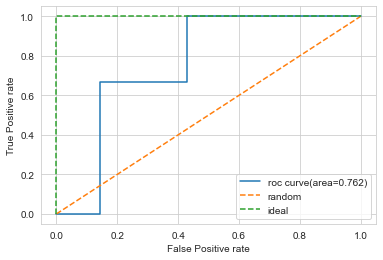

In [13]:
from sklearn.metrics import roc_curve,auc

Y_score=annual_income.predict_proba(X2_test)[:,1]#検出データがクラスに属する確率
fpr,tpr,thresholds=roc_curve(y_true=Y2_test,y_score=Y_score)

plt.plot(fpr,tpr,label='roc curve(area=%0.3f)'%auc(fpr,tpr))
plt.plot([0,1],[0,1],linestyle='--',label='random')
plt.plot([0,0,1],[0,1,1],linestyle='--',label='ideal')
plt.legend()
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score
print('auc=',roc_auc_score(y_true=Y2_test,y_score=Y_score))

auc= 0.7619047619047619


In [7]:
#中央値以上の選手を１、それ以外を０とする
def over_med(x):
    if x>df_st['年俸'].median():
        return 1
    else:
        return 0
df_st['over_med']=df_st['年俸'].apply(over_med)
df_st.head(6)

,年俸,打率,試合数,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS,over_med
0,-0.645330,3.891134,-1.752799,-1.336755,-1.341736,-1.287047,-0.881781,-1.032623,-0.617165,-1.010873,-0.933900,-1.199234,-0.611855,-0.987829,2.965014,1.209389,2.678457,0
1,-0.677089,3.891134,-1.996912,-1.431695,-1.431149,-1.433370,-0.881781,-1.152952,-0.617165,-1.148274,-0.933900,-1.346140,-0.611855,-0.987829,1.780983,0.268213,1.223628,0
2,-0.680782,1.669184,-0.857717,-1.368401,-1.359619,-1.345576,-0.881781,-1.213117,-0.416893,-1.148274,-0.933900,-1.297171,-0.611855,-0.987829,0.113332,0.268213,0.285028,0
3,-0.636467,1.669184,-0.654290,-1.392136,-1.404325,-1.404105,-0.881781,-1.213117,-0.416893,-1.148274,-0.401794,-1.297171,-0.128292,-0.987829,1.780983,-0.865734,0.285028,0
4,-0.677089,1.424769,-1.386629,-1.289284,-1.288089,-1.257782,-0.700997,-1.092787,-0.617165,-1.079573,-0.933900,-1.248203,-0.128292,-0.987829,0.463539,1.526894,1.523980,0
5,-0.684475,0.624867,-0.979774,-1.123139,-1.145029,-1.111459,-0.881781,-1.092787,-0.416893,-0.667373,-0.933900,-0.954390,-0.611855,-0.987829,1.163952,-0.060631,0.604152,0


In [8]:
X3=df_st.drop(['年俸','over_med'],axis=1)#説明変数(年棒とover_med以外の数)
Y3=df_st['over_med']#目的変数

In [9]:
#テストデータと訓練データの分ける
X3_train,X3_test,Y3_train,Y3_test=train_test_split(X3,Y3,test_size=0.2,shuffle=True)

In [10]:
#ロジスティックモデルを準備
annual_income=LogisticRegression()
#学習する
annual_income.fit(X3_train,Y3_train)

LogisticRegression()

In [27]:
#データフレームに格納
annual_income_coeff=DataFrame([X3.columns,annual_income.coef_[0]]).T
#実行
annual_income_coeff

,0,1
0,打率,-0.7589
1,試合数,0.190288
2,打席数,0.577272
3,打数,0.568244
4,安打,0.436593
5,本塁打,0.376229
6,打点,0.088699
7,盗塁,-0.027797
8,四球,0.905649
9,死球,-1.258941


In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

Y3_pred=annual_income.predict(X3_test)

print('confusion matrix=\n',confusion_matrix(y_true=Y3_test,y_pred=Y3_pred))#混同行列
print('accuracy=',accuracy_score(y_true=Y3_test,y_pred=Y3_pred))#正解率
print('precision=',precision_score(y_true=Y3_test,y_pred=Y3_pred))#精度
print('recall=',recall_score(y_true=Y3_test,y_pred=Y3_pred))#検出率
print('f1 score=',f1_score(y_true=Y3_test,y_pred=Y3_pred))#F値(検出精度と検出率の調和平均)

confusion matrix=
 [[2 1]
 [2 5]]
accuracy= 0.7
precision= 0.8333333333333334
recall= 0.7142857142857143
f1 score= 0.7692307692307692


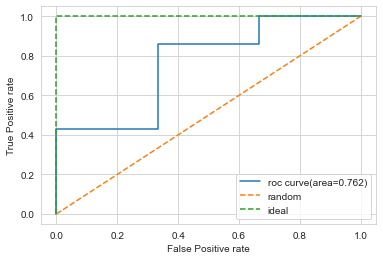

In [12]:
from sklearn.metrics import roc_curve,auc

Y_score=annual_income.predict_proba(X3_test)[:,1]#検出データがクラスに属する確率
fpr,tpr,thresholds=roc_curve(y_true=Y3_test,y_score=Y_score)

plt.plot(fpr,tpr,label='roc curve(area=%0.3f)'%auc(fpr,tpr))
plt.plot([0,1],[0,1],linestyle='--',label='random')
plt.plot([0,0,1],[0,1,1],linestyle='--',label='ideal')
plt.legend()
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score
print('auc=',roc_auc_score(y_true=Y3_test,y_score=Y_score))

auc= 0.7619047619047619
